In [43]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

In [44]:
CTX = torch.device("cuda")

train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(train_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

train_data.train_data.to(CTX)
test_data.test_data.to(CTX)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [45]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28 * 28, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 10),
    )

  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits
model = NeuralNetwork()

In [46]:
# HYPER PARAMETERS
learning_rate = 1e-3
batch_size = 64
epochs = 20

In [47]:
# Loss function
loss_fn = nn.CrossEntropyLoss()

In [48]:
# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [49]:
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[13, 17], gamma=0.8)

In [50]:
def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader):
    pred = model(X)
    loss = loss_fn(pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss, current = loss.item(), batch * len(X)
      print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0, 0

  with torch.no_grad():
    for X, y in dataloader:
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(axis=1) == y).type(torch.float).sum().item()
  
  test_loss /= num_batches
  correct /= size
  print(f"Test Error: \n Accuracy: {(100 * correct):>0.1f}%, Avg loss: {test_loss:>8f}\n")

Epoch 1
-----------------
loss: 2.298598 [    0/60000]
loss: 2.296029 [ 6400/60000]
loss: 2.265423 [12800/60000]
loss: 2.255583 [19200/60000]
loss: 2.265115 [25600/60000]
loss: 2.214511 [32000/60000]
loss: 2.239211 [38400/60000]
loss: 2.193048 [44800/60000]
loss: 2.186262 [51200/60000]
loss: 2.172050 [57600/60000]
Test Error: 
 Accuracy: 40.1%, Avg loss: 2.155492

Epoch 2
-----------------
loss: 2.165793 [    0/60000]
loss: 2.165688 [ 6400/60000]
loss: 2.096629 [12800/60000]
loss: 2.103309 [19200/60000]
loss: 2.091864 [25600/60000]
loss: 2.014884 [32000/60000]
loss: 2.052371 [38400/60000]
loss: 1.963041 [44800/60000]
loss: 1.956958 [51200/60000]
loss: 1.908040 [57600/60000]
Test Error: 
 Accuracy: 58.1%, Avg loss: 1.891956

Epoch 3
-----------------
loss: 1.922421 [    0/60000]
loss: 1.906024 [ 6400/60000]
loss: 1.772136 [12800/60000]
loss: 1.804521 [19200/60000]
loss: 1.741448 [25600/60000]
loss: 1.674580 [32000/60000]
loss: 1.703033 [38400/60000]
loss: 1.583810 [44800/60000]
loss: 1.

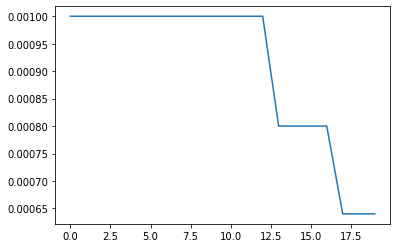

In [51]:
import matplotlib.pyplot as plt

lrs = []
for t in range(epochs):
  print(f"Epoch {t+1}\n-----------------")
  lrs.append(optimizer.param_groups[0]['lr'])
  train_loop(train_dataloader, model, loss_fn, optimizer)
  scheduler.step()
  test_loop(test_dataloader, model, loss_fn)
plt.plot(lrs)
print("DONE!")

# Using Scheduler for learing rate

In [59]:
model2 = NeuralNetwork()

In [60]:
# Hyper Parameters
learning_rate = 1e-3
batch_size = 64
epoch = 20

In [61]:
# Loss function
loss_fn2 = nn.CrossEntropyLoss()

In [62]:
# Optimizer
optimizer2 = torch.optim.SGD(model2.parameters(), lr=learning_rate)

In [63]:
# Scheduler
# https://sanghyu.tistory.com/113

#scheduler2 = torch.optim.lr_scheduler.MultiStepLR(optimizer2, milestones=[6, 9], gamma=0.75)
scheduler2 = \
torch.optim.lr_scheduler.LambdaLR(optimizer=optimizer2, lr_lambda=lambda epoch: 0.975 ** epoch)

In [64]:
def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader):
    pred = model(X)
    optimizer.zero_grad()
    
    loss = loss_fn(pred, y)

    loss.backward()
    optimizer.step()
    if batch % 100 == 0:
      loss, current = loss.item(), batch * len(X)
      print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0, 0

  with torch.no_grad():
    for X, y in dataloader:
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(axis=1) == y).type(torch.float).sum().item()
  
  test_loss /= num_batches
  correct /= size
  print(f"Test Error: \n Accuracy: {(100 * correct):>0.1f}%, Avg loss: {test_loss:>8f}\n")


Epoch 1
-----------------
loss: 2.310142 [    0/60000]
loss: 2.283164 [ 6400/60000]
loss: 2.270059 [12800/60000]
loss: 2.260226 [19200/60000]
loss: 2.227029 [25600/60000]
loss: 2.201987 [32000/60000]
loss: 2.208220 [38400/60000]
loss: 2.174147 [44800/60000]
loss: 2.177890 [51200/60000]
loss: 2.140780 [57600/60000]
Test Error: 
 Accuracy: 47.6%, Avg loss: 2.128576

Epoch 2
-----------------
loss: 2.148651 [    0/60000]
loss: 2.132764 [ 6400/60000]
loss: 2.076850 [12800/60000]
loss: 2.097780 [19200/60000]
loss: 2.020149 [25600/60000]
loss: 1.962969 [32000/60000]
loss: 2.004545 [38400/60000]
loss: 1.919945 [44800/60000]
loss: 1.936937 [51200/60000]
loss: 1.865923 [57600/60000]
Test Error: 
 Accuracy: 52.3%, Avg loss: 1.849626

Epoch 3
-----------------
loss: 1.896353 [    0/60000]
loss: 1.860356 [ 6400/60000]
loss: 1.741950 [12800/60000]
loss: 1.795047 [19200/60000]
loss: 1.653492 [25600/60000]
loss: 1.619658 [32000/60000]
loss: 1.662071 [38400/60000]
loss: 1.559348 [44800/60000]
loss: 1.

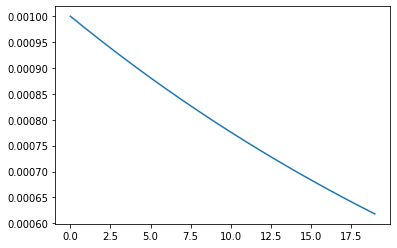

In [65]:
import matplotlib.pyplot as plt
lrs = []
for t in range(epochs):
  print(f"Epoch {t+1}\n-----------------")
  lrs.append(optimizer2.param_groups[0]['lr'])
  train_loop(train_dataloader, model2, loss_fn2, optimizer2)
  scheduler2.step()
  test_loop(test_dataloader, model2, loss_fn2)
plt.plot(lrs)
print("DONE!")